# Monty Hall  Problem in Python 
## (With Jupyter Notebook)

This is personal, to get familiar with GitHub, Classes, Pandas and plotting in Python using Jupyter Notebook. This provide a simple test of exploration of the [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem). This is the descption of the problem:

        Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? 
        (obteined in the page of the link)

Here I will show you that if you are in this situation you have to switch the door if you can. This will be performed with code in Python that emulate the game. 

##### First lets create the class contest wich will have:
- The election door of the participant modelate as a list
- The location of the prize behind the doors as a list
- The function "go" that will run the contest according the strategy of input
- The return of the function "go" is True (Win) or False (Lose)

In [36]:
from random import randint

class Contest:
    def __init__(self,dqty):
        self.dqty = dqty 
        self.participant = []
        self.prize = []
        for i in range(dqty):
            self.participant.append(0)
            self.prize.append(0)

    # The next function emulate the contest
    def go(self):
        participant = self.participant.copy()
        prize = self.prize.copy()
        participant[randint(0, self.dqty)-1] = 1 
        prize[randint(0, self.dqty-1)] = 1
        for i in range(len(participant)):
            if participant[i] == 0 and participant[i] == prize[i]:
                participant[i] = 'x'
                break
        pos_changed = participant.index(0)
        if prize[pos_changed] == 1:
            return True
        elif prize[pos_changed] == 0:
            return False

How it works? It's quite simple, and has 3 steps:

1) The selected door by player and the prize are assigned randomly, in this example I'll consider: participant = [0, 1, 0] and prize = [0, 0, 1]

2) Then, the program search the first coincidence for zero value in the both list at the same position, when this position is reached the value is changed for 'x' in the list participant, in this case the firs position is the only door that the host can open following the logic of the game, so participant = ['x', 1, 0]. This is a "way" to tell to participant that the prize wasn't in that door.

3) The last step is only check if in the another door is the prize, because the strategy is change the door when the host open the first one. Maybe I could have changed the list participant to ['x', 0, 1] and compare the list to check if the prize is in the door with "1". But is more simple to check directly the door with 0, cause this will be the new door selected.

Then, I create a class to sotorage the results:

- It has two lists, each list have zero as unic item inside
- The function "add" use an input True or False (Win or Lose), this take the last position in the list and increase this value and append the new value in the list

In [38]:
class Result:
    def __init__(self):
        self.wins = [0]
        self.looses = [0]
    def add(self,value):
        if value:
            self.wins.append(self.wins[-1]+1)
            self.looses.append(self.looses[-1])
        else:
            self.wins.append(self.wins[-1])
            self.looses.append(self.looses[-1]+1)

Here I make the iteration of the contest N times using the two classes defined (The 3 of the definition in the Contest Class is the number of doors, I will talk below about this). Here the number of iterations are 10.000 but we can obtain same results with lower numbers:

In [42]:
contest = Contest(3)
result = Result()

for i in range(10000):
    result.add(contest.go())

Now, lets plot the result data in two lines, for this I imported "pyplot":

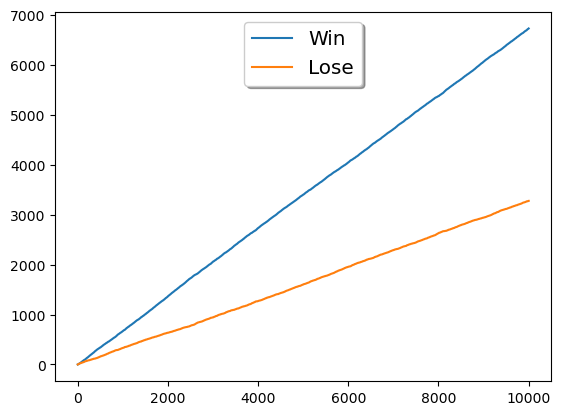

In [43]:
from matplotlib import pyplot as plt

plt.plot(result.wins,label='Win')
plt.plot(result.looses,label='Lose')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

Here we can se that is an tendecy for both lines and the wins are always greather tan loses. Also it reach an stable proportion win/lose, for check this I used Pandas to create a DataFrame whit this two list and perform the operation win/lose:

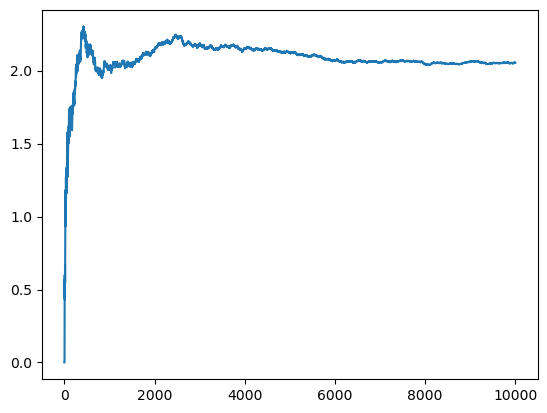

In [44]:
import pandas as pd

df = pd.DataFrame(list(zip(result.wins, result.looses)),
               columns =['wins', 'loses'])

plt.plot(df['wins']/df['loses'] )
plt.show()

This implies that:
    
    wins/loses = 2      or      wins = 2*loses          (1)
    
Also, if we consider the total probability we can say:

    wins + loses = 1                                    (2)

Using (1) and (2), we have:

    3*loses = 1         or      loses = 1/3     and     wins = 2/3

This is the same to say that we have 66.6% to win and 33.3% to lose using the strategy to change our selection after the host open the empty door.

But wait, what if we want to know the result to stay in the fisrt decition and don't change the door selected... Well, in the next block of code I changed the Class Contest to receive the strategy that I want to test. If you want to test a new strategy you can write the code to do that.

In [47]:
class Contest:
    def __init__(self,dqty,strategy):
        self.dqty = dqty 
        self.strategy = strategy
        self.participant = []
        self.prize = []
        for i in range(dqty):
            self.participant.append(0)
            self.prize.append(0)

    def go(self):
        participant = self.participant.copy()
        prize = self.prize.copy()
        if self.strategy == "Monty":
            participant[randint(0, self.dqty)-1] = 1 
            prize[randint(0, self.dqty-1)] = 1
            while participant.count(0)-1:
                for i in range(len(participant)):
                    if participant[i] == 0 and participant[i] == prize[i]:
                        participant[i] = 'x'
                        pos_init = participant.index(1)
                        pos_changed = participant.index(0)
                        participant[pos_init] = 0
                        participant[pos_changed] = 1
                        break

            if prize[participant.index(1)] == 1:
                return True
            elif prize[participant.index(1)] == 0:
                return False
        elif self.strategy == "Stay":
            participant[randint(0, self.dqty)-1] = 1 
            prize[randint(0, self.dqty-1)] = 1
            pos_selected = participant.index(1)
            if prize[pos_selected] == 1:
                return True
            elif prize[pos_selected] == 0:
                return False
           
        elif self.strategy == "New strategy":
            ### You can write the code of your strategy here
            return None

And then we will run all again.

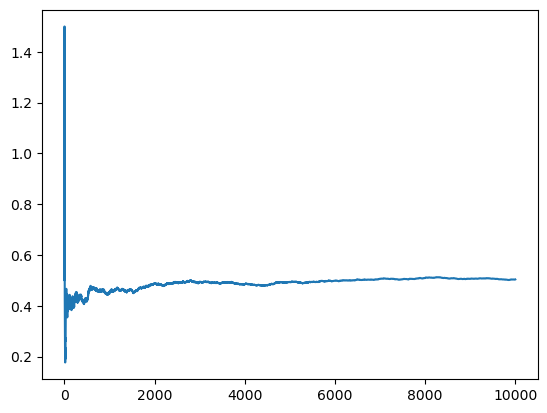

In [48]:
contest = Contest(3,"Stay")
result = Result()

for i in range(10000):
    result.add(contest.go())

df = pd.DataFrame(list(zip(result.wins, result.looses)),
               columns =['wins', 'loses'])

plt.plot(df['wins']/df['loses'] )
plt.show()

So, we have:

wins/loses = 0.5      or      loses = 2*wins          (3)

Using (2) and (3):

3*wins = 1         or      wins = 1/3     and     loses = 2/3

Also we can check this making a graph of the wins and loses by iteration:

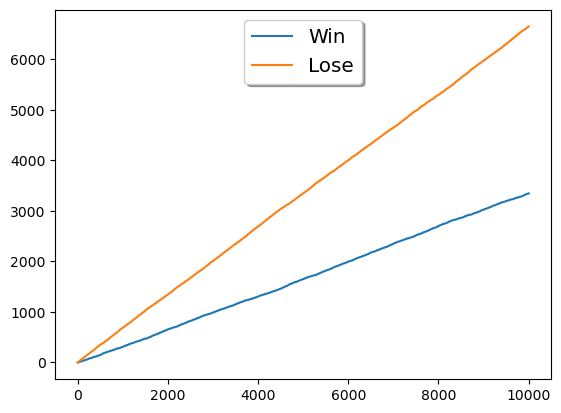

In [49]:
plt.plot(result.wins,label='Win')
plt.plot(result.looses,label='Lose')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

As you see the result are opposite in each case and the best strategy is change the door if you can. 